<a href="https://colab.research.google.com/github/A-Roopa/Brainwave_matrix_intern/blob/main/Supermarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install scikit-surprise


**Step 1:Import Libraries **

In [45]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from statsmodels.tsa.arima.model import ARIMA
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate



**Step 2: Load the Dataset**

In [46]:
# Load dataset (replace with your dataset path)
data = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


**Step:3 Data Cleaning and Preparation**

In [47]:
# Display first few rows of the dataset
print(data.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [74]:
# Check for missing values
print(data.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


**Step 4: Exploratory Data Analysis (EDA)**

**a. Descriptive Statistics**

In [48]:
# Total Sales
total_sales = data['Total'].sum()
print(f'Total Sales: {total_sales}')

Total Sales: 322966.749


In [49]:

# Average Order Value (AOV)
aov = data['Total'].mean()
print(f'Average Order Value: {aov}')

Average Order Value: 322.966749


In [50]:
# Total Units Sold
total_units_sold = data['Quantity'].sum()
print(f'Total Units Sold: {total_units_sold}')

Total Units Sold: 5510


In [51]:
# Profit Margin
avg_profit_margin = data['gross margin percentage'].mean()
print(f'Average Profit Margin: {avg_profit_margin}%')


Average Profit Margin: 4.761904762%


**b. Sales Over Time**

In [52]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08
...,...
995,2019-01-29
996,2019-03-02
997,2019-02-09
998,2019-02-22


In [53]:
# Resample daily sales
daily_sales = data.resample('D', on='Date').sum()
daily_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,765-26-6951530-90-9855891-01-7034493-65-624855...,AABCCCAAACBB,YangonYangonMandalayNaypyitawNaypyitawNaypyita...,NormalMemberNormalMemberNormalNormalNormalMemb...,MaleMaleFemaleFemaleFemaleMaleFemaleFemaleFema...,Sports and travelHome and lifestyleElectronic ...,659.95,81,225.9610,4745.1810,10:3914:4719:0719:4815:5111:4313:5520:2614:421...,Credit cardCashCashCredit cardCashCashCashEwal...,4519.22,57.142857,225.9610,79.0
2019-01-02,504-35-8843446-47-6729244-08-0162198-84-713274...,ACBBBACB,YangonNaypyitawMandalayMandalayMandalayYangonN...,NormalNormalNormalMemberNormalMemberMemberNormal,MaleMaleFemaleMaleMaleMaleFemaleMale,Sports and travelFashion accessoriesHealth and...,357.08,48,92.6430,1945.5030,16:5718:0913:0013:4018:5015:2416:1920:08,CashCredit cardCashCashCashEwalletCredit cardC...,1852.86,38.095238,92.6430,48.4
2019-01-03,249-42-3782749-24-1565687-15-1097422-29-878634...,AACACBBB,YangonYangonNaypyitawYangonNaypyitawMandalayMa...,NormalNormalMemberNormalMemberNormalNormalMember,MaleFemaleFemaleFemaleMaleMaleFemaleMale,Health and beautyHealth and beautyHealth and b...,475.66,37,98.9585,2078.1285,11:3612:0219:1716:4710:3013:0720:2419:08,EwalletEwalletCashCredit cardCredit cardCashEw...,1979.17,38.095238,98.9585,64.9
2019-01-04,279-74-2924672-51-8681656-16-1063731-14-219972...,BCBABA,MandalayNaypyitawMandalayYangonMandalayYangon,MemberMemberNormalMemberMemberMember,MaleFemaleMaleFemaleFemaleMale,Electronic accessoriesElectronic accessoriesSp...,310.46,32,77.3185,1623.6885,19:4018:1913:2413:3419:0113:21,CashCredit cardCredit cardEwalletCashCash,1546.37,28.571429,77.3185,39.1
2019-01-05,750-67-8428628-34-3388217-58-1179144-51-608584...,ACAABCABBCCA,YangonNaypyitawYangonYangonMandalayNaypyitawYa...,MemberNormalMemberMemberMemberMemberNormalMemb...,FemaleMaleMaleMaleFemaleFemaleFemaleFemaleFema...,Health and beautyFashion accessoriesHome and l...,739.64,55,168.4135,3536.6835,13:0820:5411:2516:0519:5012:4017:2911:3220:402...,EwalletCredit cardCashCredit cardCredit cardEw...,3368.27,57.142857,168.4135,89.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-26,163-56-7055848-24-9445411-77-0180449-27-291873...,CCABBCABAAAAC,NaypyitawNaypyitawYangonMandalayMandalayNaypyi...,MemberMemberMemberMemberNormalNormalNormalMemb...,MaleMaleMaleFemaleFemaleFemaleFemaleFemaleFema...,Fashion accessoriesHealth and beautyElectronic...,558.64,52,93.4530,1962.5130,19:2018:0320:1411:0210:3410:3113:5419:2811:071...,CashCashEwalletCredit cardCredit cardEwalletCa...,1869.06,61.904762,93.4530,86.1
2019-03-27,106-35-6779633-44-8566238-49-0436423-57-299327...,AAABABBABC,YangonYangonYangonMandalayYangonMandalayMandal...,MemberMemberNormalNormalNormalMemberNormalMemb...,MaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMale,Home and lifestyleFood and beveragesHealth and...,568.41,45,138.2295,2902.8195,11:2620:3513:4819:1814:0315:0819:1116:3020:291...,CashCredit cardCredit cardEwalletCashEwalletCr...,2764.59,47.619048,138.2295,67.6
2019-03-28,212-62-1842573-58-9734633-09-3463531-80-178426...,ABCACACAAA,YangonMandalayNaypyitawYangonNaypyitawYangonNa...,NormalNormalNormalNormalMemberMemberMemberNorm...,MaleFemaleFemaleMaleFemaleMaleFemaleFemaleFema...,Food and beveragesFashion accessoriesElectroni...,455.25,48,106.1620,2229.4020,16:4413:4112:5817:3813:5715:3119:1615:3016:062...,CashEwalletCredit cardCashEwalletCredit cardCr...,2123.24,47.619048,106.1620,70.5


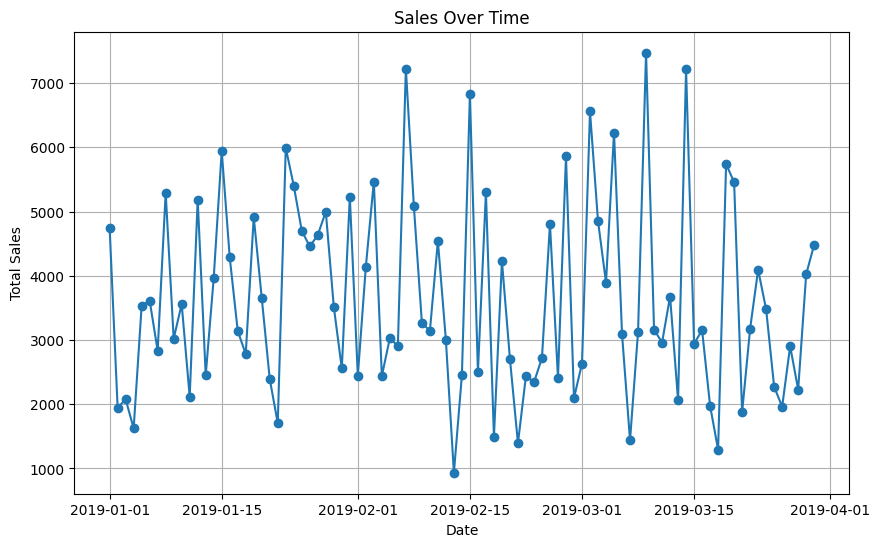

In [55]:
# Plot Sales Over Time
plt.figure(figsize=(10,6))
plt.plot(daily_sales.index, daily_sales['Total'], marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**c. Product Category Analysis**

In [56]:
# Sales by Product Category
product_sales = data.groupby('Product line')['Total'].sum().sort_values(ascending=False)
product_sales

,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


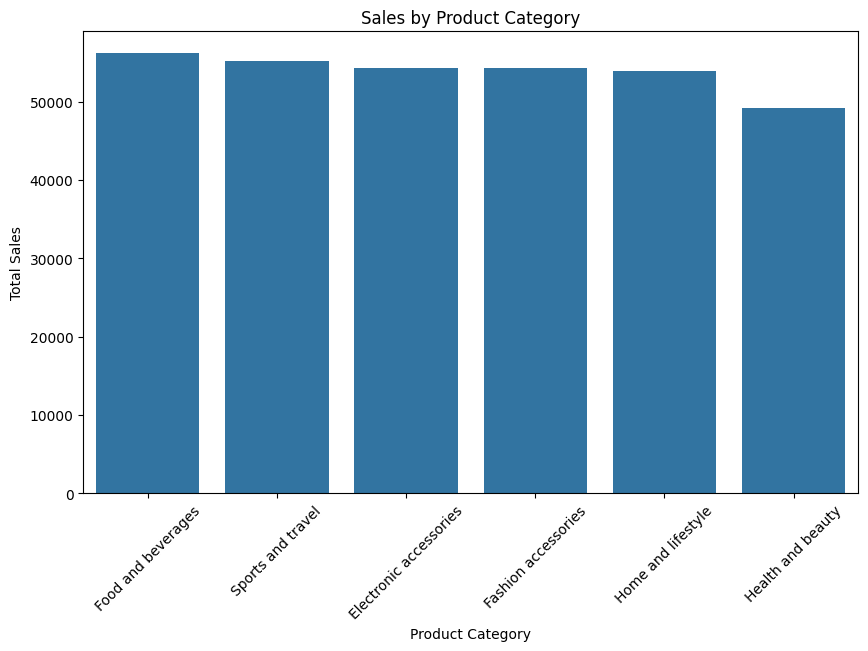

In [57]:
# Bar Plot for Product Category Sales
plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Sales by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


**d. Geographic Analysis**

In [58]:
# Sales by City
city_sales = data.groupby('City')['Total'].sum().sort_values(ascending=False)
city_sales

,Total
City,
Naypyitaw,110568.7065
Yangon,106200.3705
Mandalay,106197.6720


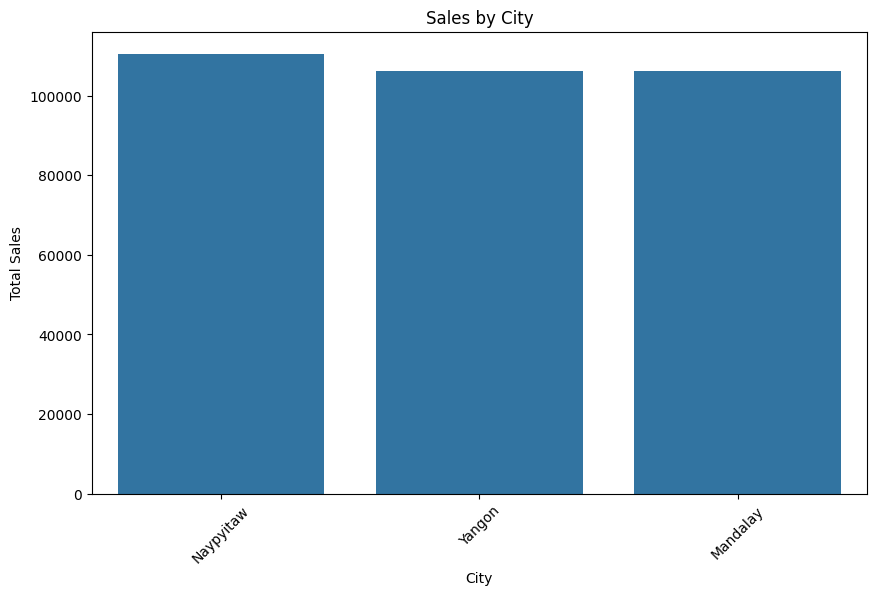

In [59]:
# Bar Plot for Sales by City
plt.figure(figsize=(10,6))
sns.barplot(x=city_sales.index, y=city_sales.values)
plt.title('Sales by City')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()





**e. Customer Segment Analysis**

In [60]:
# Sales by Customer Type
customer_sales = data.groupby('Customer type')['Total'].sum()
customer_sales

,Total
Customer type,
Member,164223.444
Normal,158743.305


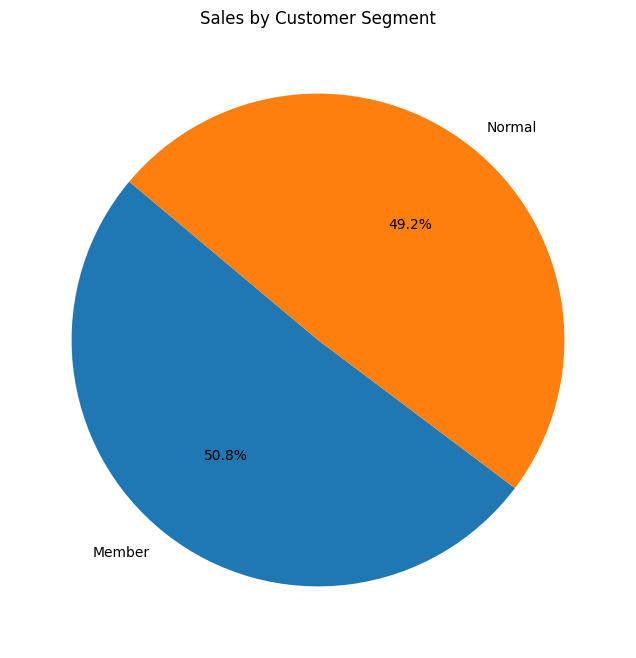

In [61]:

# Pie Chart for Customer Segment
plt.figure(figsize=(8,8))
plt.pie(customer_sales.values, labels=customer_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Customer Segment')
plt.show()


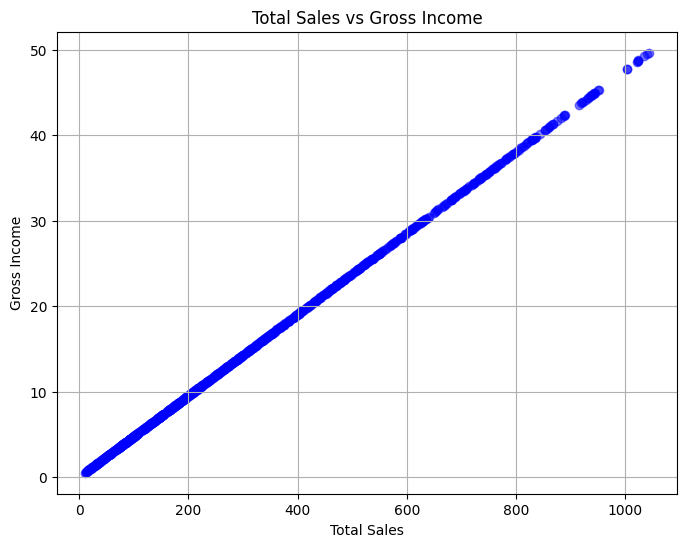

In [62]:
# Scatter Plot of Total Sales vs Gross Income
plt.figure(figsize=(8,6))
plt.scatter(data['Total'], data['gross income'], alpha=0.5, color='b')
plt.title('Total Sales vs Gross Income')
plt.xlabel('Total Sales')
plt.ylabel('Gross Income')
plt.grid(True)
plt.show()


**Step 5: Advance Techniques**

**a. Sales Forecasting (Using ARIMA)**

In [63]:
# Aggregate monthly sales data
monthly_sales = data.resample('M', on='Date').sum()['Total']
monthly_sales

<ipython-input-63-08a570283221>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='Date').sum()['Total']


,Total
Date,
2019-01-31,116291.868
2019-02-28,97219.374
2019-03-31,109455.507


In [64]:
# Fit ARIMA model (p, d, q parameters can be tuned)
model = ARIMA(monthly_sales, order=(5, 1, 0))
model
model_fit = model.fit()
model_fit

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [65]:

# Forecast sales for the next 6 months
forecast = model_fit.forecast(steps=6)
forecast

,predicted_mean
2019-04-30,106088.529975
2019-05-31,107568.151464
2019-06-30,107077.138546
2019-07-31,107268.774817
2019-08-31,107200.829758
2019-09-30,107226.309550


<ipython-input-66-d27307bb6a8d>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=6, freq='M'), forecast, label='Forecasted Sales', color='red')


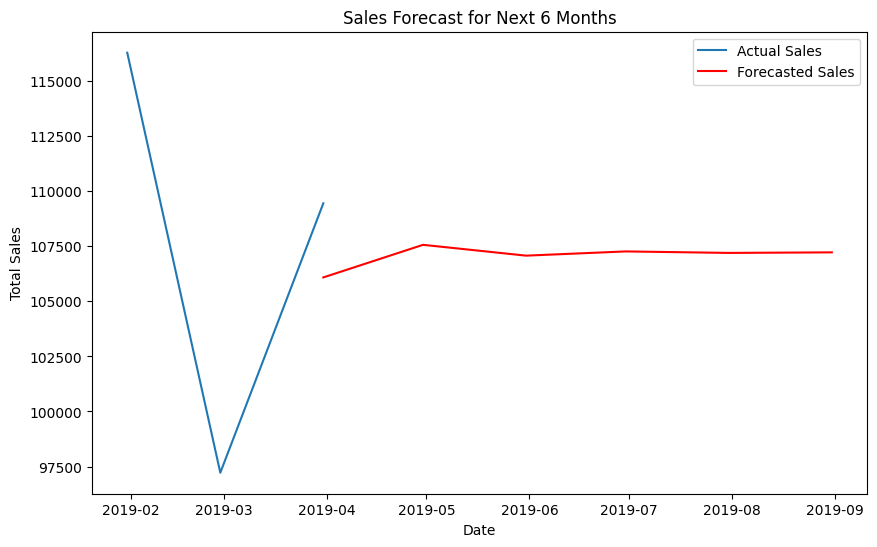

In [66]:
# Plot actual vs forecasted sales
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=6, freq='M'), forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


**b. Customer Segmentation using K-Means**

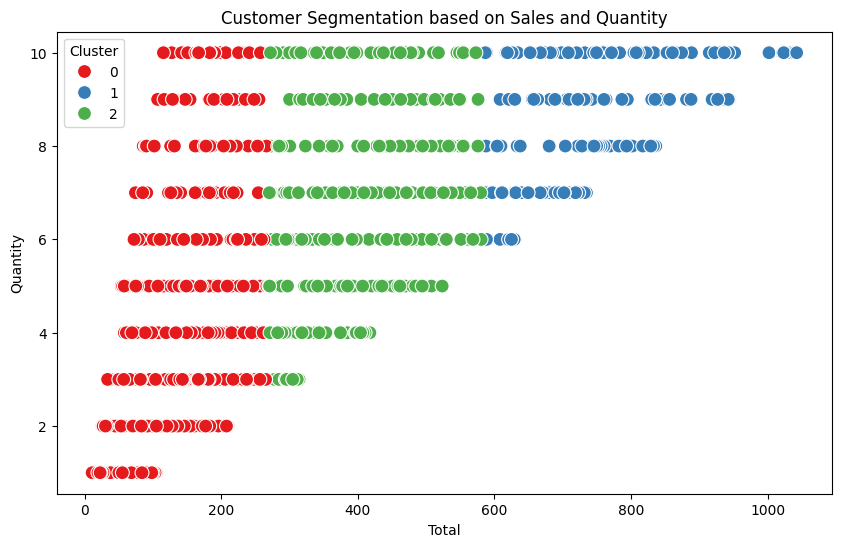

In [77]:
from sklearn.cluster import KMeans

# Group by Invoice ID to get total sales and quantity per invoice
invoice_data = data.groupby('Invoice ID').agg({
    'Total': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
invoice_data['Cluster'] = kmeans.fit_predict(invoice_data[['Total', 'Quantity']])

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=invoice_data, x='Total', y='Quantity', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segmentation based on Sales and Quantity')
plt.show()


c.**Churn Prediction (Using Logistic Regression)**

In [88]:
# Simulating the 'Churn' column with both 0s and 1s
np.random.seed(42)
data['Churn'] = np.random.choice([0, 1], size=len(data), p=[0.7, 0.3])  # 70% not churned (0), 30% churned (1)

# Check the distribution of churn
print(data['Churn'].value_counts())

Churn
0    712
1    288
Name: count, dtype: int64


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_test, y_train, y_test

(        Total  Quantity
 405  282.4920         4
 768  401.6880         4
 369  203.1750         9
 421  264.7575         3
 659   58.2225         1
 ..        ...       ...
 636  212.7825         7
 753  384.7200         5
 551  513.2295         9
 900  423.7380         9
 327  395.8920         4
 
 [700 rows x 2 columns],
         Total  Quantity
 805  325.3740         4
 132  146.3280         4
 799  455.1225         5
 801  253.6800         8
 196   91.7700         2
 ..        ...       ...
 744  266.0280         8
 442  843.0345         9
 297  493.7940         6
 676  470.9880         7
 521  523.9710         6
 
 [300 rows x 2 columns],
 405    1
 768    0
 369    0
 421    1
 659    0
       ..
 636    0
 753    0
 551    1
 900    0
 327    0
 Name: Churn, Length: 700, dtype: int64,
 805    1
 132    0
 799    1
 801    0
 196    1
       ..
 744    0
 442    0
 297    0
 676    0
 521    0
 Name: Churn, Length: 300, dtype: int64)

In [ ]:
# Check if stratification worked by printing the class distribution in train and test sets
print("Training set class distribution:")
print(y_train.value_counts())
print("Test set class distribution:")
print(y_test.value_counts())

In [87]:
# Train and evaluate the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


Churn
0    712
1    288
Name: count, dtype: int64
Training set class distribution:
Churn
0    498
1    202
Name: count, dtype: int64
Test set class distribution:
Churn
0    214
1     86
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       214
           1       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
